## 2. Getting started with AutoKeras

#### Installing Auto-Keras

In [45]:
# Install AutoKeras
!pip3 install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc4
!pip3 install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc4) to /tmp/pip-req-build-5s8d8rui
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-5s8d8rui
  Running command git checkout -q 3189ab613e022d53c511348a10aed69d821f3cd1
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc4-cp36-none-any.whl size=92365 sha256=a44c462346da37ab5f92a1f15c8dc99f0910830db9cf587789ab8e75c1b95947
  Stored in directory: /tmp/pip-ephem-wheel-cache-yi2r8dis/wheels/f6/84/20/5b1be7aae47964b49fa6b39881440a3a23d2a73d84bc097aeb
Successfully built keras-tuner


In [46]:
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence

#### Getting the MNIST dataset
We have first to download the MNIST data and have a quick look to the dataset shape

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We can see from the output above that each dataset contains images of size 28x28 pixels.
Now let's see what a digit looks like 




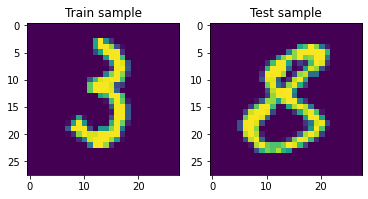

In [48]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(x_train[1234])
ax.set_title('Train sample')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()



#### How the digits are distributed?

When we are working with data sets, it is very important to check that the data is distributed homogeneously, this can be done easily using numpy functions.

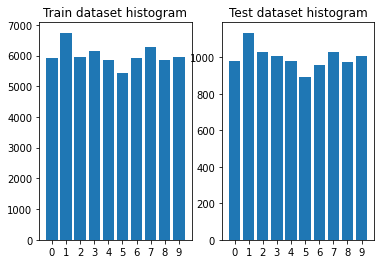

In [49]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)
_, axs = plt.subplots(1, 2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')
axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')
plt.show()

#### Creating an image classifier

Now, we will use the AutoKeras ImageClassifier to find the best classification model. Just for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 2, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [50]:
# Create a image classifier object defining
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)

# Search for the optimal classifier for the MNIST training dataset
clf.fit(x_train, y_train, epochs=2)

Trial 1 Complete [00h 00m 17s]
val_loss: 0.04953055828809738

Best val_loss So Far: 0.04953055828809738
Total elapsed time: 00h 00m 17s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1582 - accuracy: 0.9522
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0720 - accuracy: 0.9774
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


#### Evaluating the model with the test set
After training it's time to measure the real prediction of our model using the reserved test dataset

In [51]:
metrics = clf.evaluate(x_test, y_test)
print(metrics)

313/313 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9837
[0.049529921263456345, 0.9836999773979187]


Lets see how is predicting this single sample

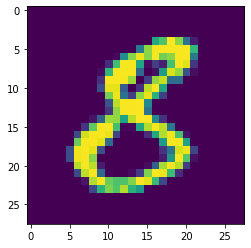

In [52]:
fig = plt.figure()
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()

In [53]:
print(y_test[1234]) # First we print the true value from the label dataset
print(clf.predict(x_test[1234, None])) # Now we print the predicted value using our classifier 

8
[['8']]


#### Visualizing the model
Now we can take a look at the architecture of the best generated model

In [54]:
# First we export the model to a keras model
model = clf.export_model()

# Now, we ask for the model Sumary:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)       

There is a more graphical way to visualize the model, let's see it:



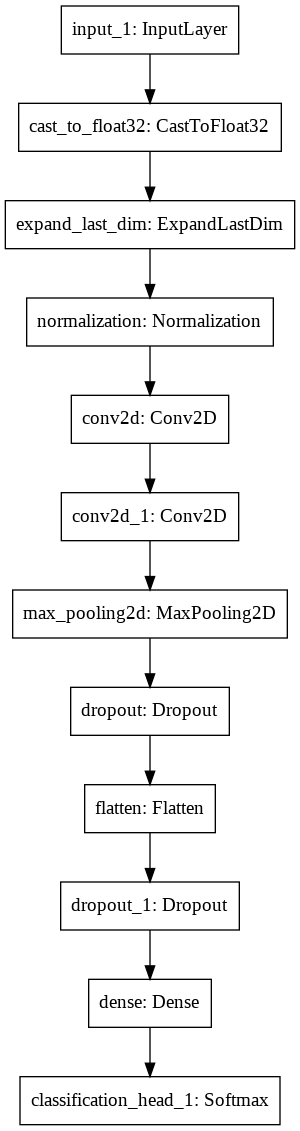

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(clf.export_model())